<a href="https://colab.research.google.com/github/Batek26/Finding-edgepoints-of-line---CNN/blob/main/Load_and_test_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
from google.colab.patches import cv2_imshow
import cv2
import copy
from keras.models import *
from keras.layers import *
from keras.optimizers import *
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
def create_white_background():
  img = np.zeros([64, 64],dtype=np.uint8)
  img[:] = 255
  return img

In [3]:
def model_test_function():
  
  start_point = (np.random.randint(0, 64), np.random.randint(0, 64))
  end_point = (np.random.randint(0, 64), np.random.randint(0, 64))
  tmp = create_white_background()
  line_to_predict = cv2.line(tmp, start_point, end_point, (0,0,0), 1)
  line_to_predict = line_to_predict.reshape(1, 64, 64, 1)
  line_to_predict = line_to_predict.astype('float32') / 255

  endpoints_predicted = model.predict(line_to_predict)

  print('Image of random line to predict:')
  cv2_imshow(line_to_predict[0] * 255)
  print('Predicted image with edgepoints:')
  cv2_imshow(endpoints_predicted[0] * 255)

  factor = 0.5
  tries = 1
  max_tries = 1000

  while len(np.where(endpoints_predicted[0] < factor)[0]) != 2 and tries < 1000:
    if len(np.where(endpoints_predicted[0] < factor)[0]) < 2:
      factor += 0.02
    elif len(np.where(endpoints_predicted[0] < factor)[0]) > 2:
      factor -= 0.02
    elif len(np.where(endpoints_predicted[0] < factor)[0]) == 2:
      predicted_start_point = (np.where(endpoints_predicted[0] < factor)[1][1], np.where(endpoints_predicted[0] < factor)[0][1])
      predicted_end_point = (np.where(endpoints_predicted[0] < factor)[1][0], np.where(endpoints_predicted[0] < factor)[0][0])
    tries += 1
  
  if len(np.where(endpoints_predicted[0] < factor)[0]) == 2:
    predicted_start_point = (np.where(endpoints_predicted[0] < factor)[1][1], np.where(endpoints_predicted[0] < factor)[0][1])
    predicted_end_point = (np.where(endpoints_predicted[0] < factor)[1][0], np.where(endpoints_predicted[0] < factor)[0][0])
    print(f'Number of tries: {tries}')
    print(f'Final factor: {factor:.2f}')
    print(f'Predicted points: {predicted_start_point}, {predicted_end_point}')
    print(f'Actual points: {start_point}, {end_point}')
  elif tries == 1000:
    print(f'Number of tries: {tries}')
    print(f'Final factor: {factor}')
    print('Finding points failed')

In [4]:
model = load_model('walksee_task_model.h5')
model.summary()

1/1 [==============================] - 0s 32ms/step
Image of random line to predict:


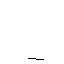

Predicted image with edgepoints:


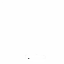

Number of tries: 17
Final factor: 0.82
Predicted points: (29, 58), (28, 58)
Actual points: (28, 58), (43, 59)


In [7]:
model_test_function()